In [1]:
import numpy as np
import glob
from PIL import Image

In [16]:
img_files = glob.glob("projectorimage/tpx/*.png")
img_files.sort()
im0 = np.array(Image.open(img_files[0]))
images_x = np.empty((im0.shape[0],im0.shape[1], len(img_files)))
for i,elem in enumerate(img_files):
    images_x[:,:,i] = np.array(Image.open(elem).convert('L'))
    
img_files = glob.glob("projectorimage/tpy/*.png")
img_files.sort()
im0 = np.array(Image.open(img_files[0]))
images_y = np.empty((im0.shape[0],im0.shape[1], len(img_files)))
for i,elem in enumerate(img_files):
    images_y[:,:,i] = np.array(Image.open(elem).convert('L'))

In [17]:
img_files = glob.glob("projectorimage/tpxi/*.png")
img_files.sort()
im0 = np.array(Image.open(img_files[0]))
images_xi = np.empty((im0.shape[0],im0.shape[1], len(img_files)))
for i,elem in enumerate(img_files):
    images_xi[:,:,i] = np.array(Image.open(elem).convert('L'))
    
img_files = glob.glob("projectorimage/tpyi/*.png")
img_files.sort()
im0 = np.array(Image.open(img_files[0]))
images_yi = np.empty((im0.shape[0],im0.shape[1], len(img_files)))
for i,elem in enumerate(img_files):
    images_yi[:,:,i] = np.array(Image.open(elem).convert('L'))

In [24]:
x_bit = (images_x>images_xi).astype("int")
y_bit = (images_y>images_yi).astype("int")
img_map = np.empty((im0.shape[0],im0.shape[1], 2))
for i in range(x_bit.shape[2]):
    img_map[:,:,0] += x_bit[:,:,i] * 2 ** i
    img_map[:,:,1] += y_bit[:,:,i] * 2 ** i
    
im = Image.fromarray(img_map[:,:,0])
im.save("x_map.tif")
im = Image.fromarray(img_map[:,:,1])
im.save("y_map.tif")

In [29]:
test = np.where(img_map[:,:,1] == 1, 255, 0)
im = Image.fromarray(test.astype(np.uint8))
im.save("x_map1.png")

In [35]:
#print(np.where(img_map[:,:,1] == 1))
np.mean(np.where(img_map[:,:,1] == 1),axis=1)

array([324., 960.])

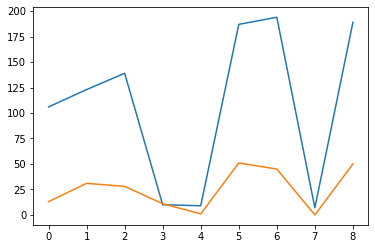

In [48]:
import matplotlib.pyplot as plt
plt.plot(images[708,3660,:])
plt.plot(images[671,3687,:])
plt.show()